In [45]:
import pandas as pd


In [46]:
X_final=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\8_Encoding\Encoded_data_X.csv")
Y_final=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\8_Encoding\Encoded_data_Y.csv")

In [48]:
Y_final['unit_bin'].head()

0    2
1    2
2    1
3    2
4    1
Name: unit_bin, dtype: int64

c:\Users\sachi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 Accuracy: 81.58 %

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73      7553
           1       0.82      0.83      0.82     68129
           2       0.82      0.82      0.82     77861

    accuracy                           0.82    153543
   macro avg       0.81      0.78      0.79    153543
weighted avg       0.82      0.82      0.82    153543



C:\Users\sachi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


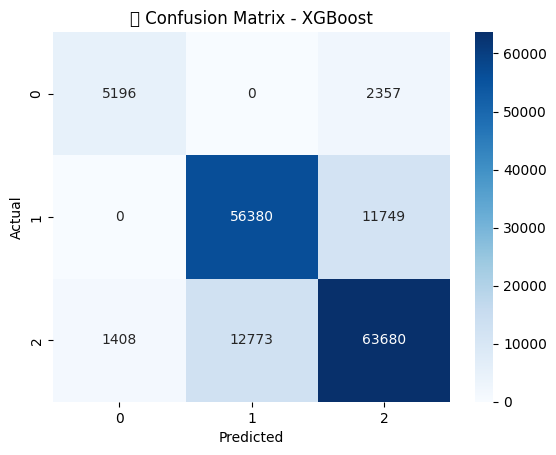

In [51]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x=X_final
y=Y_final


# 📦 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🚀 Train XGBoost Classifier
clf = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
clf.fit(X_train, y_train)

# 🔮 Predict
y_pred = clf.predict(X_test)

# 📈 Evaluate
acc = accuracy_score(y_test, y_pred)
print("🎯 Accuracy:", round(acc * 100, 2), "%")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 📊 Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - XGBoost")
plt.show()


In [52]:
y.value_counts(normalize=True)


unit_bin
2           0.507093
1           0.443750
0           0.049157
Name: proportion, dtype: float64

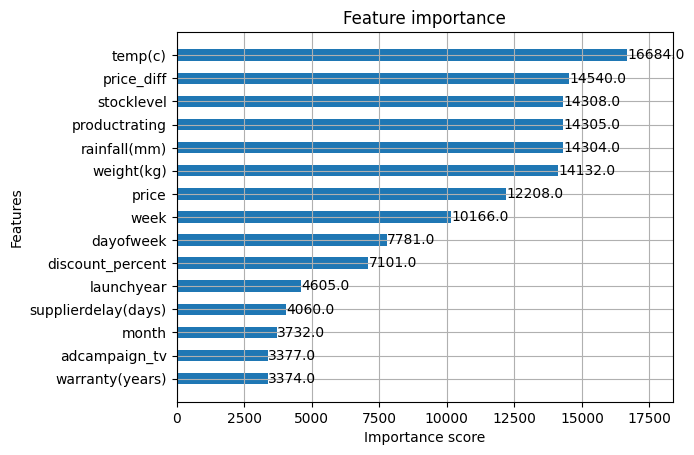

In [53]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(clf, max_num_features=15, height=0.5)
plt.show()
